## Feature extraction 

In [1]:
from jl_song_data import SongData 
import pandas as pd

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Remove non valid chords 

This `eval` is to convert string column to array colum

In [5]:
df['chords'] = df['chords'].apply(eval)

In [6]:
from jl_chord_parser import ChordParser
parser = ChordParser()

Parse returns `None` if chord is not valid

In [7]:
df['chords'] = \
    df['chords'].apply(\
        lambda chords: [chord for chord in chords if parser.parse(chord) is not None] )\


##  Extract artist 

In [8]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [9]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
11691,https://tabs.ultimate-guitar.com/tab/system_of...,Chop Suey (ver 2),2000s,Metal,"[Gm, Am, F, Eb, Gm, F, Eb, Gm, F#, A, C, Gm, G...",7a749796-bf9d-4959-8a1a-8a713ff8921c,System Of A Down
3467,https://tabs.ultimate-guitar.com/tab/dusty-spr...,I Only Want To Be With You (ver 2),1960s,Rhythm And Blues,"[G, C, D, G, Em, G, Em, C, D, C, D, G, Em, C, ...",632cd72d-3b9e-4833-994a-c69041c09761,Dusty Springfield
10272,https://tabs.ultimate-guitar.com/tab/reba-mcen...,Whoevers In New England,1980s,Country,"[F#, Abm, B, C#, F#, A#m, B, Ebm, Abm, Db, F#,...",f1cd5ff1-42e1-4907-843d-1e2a03e93552,Reba Mcentire
12620,https://tabs.ultimate-guitar.com/tab/the_platt...,Twilight Time (ver 2),1950s,Rhythm And Blues%%Rhythm And Blues,"[G, B7, Em, G, C, G, E, A7, D7, G, G, B7, Em, ...",cc46f7d1-f50e-48f9-9a7a-e956bfcb0485,The Platters
5261,https://tabs.ultimate-guitar.com/tab/hall-oate...,Kiss On My List (ver 5),1980s,Rhythm And Blues,"[C, Cmin7, F, C, Cmin7, Fmin7, Ab, Bb, C, Cmin...",c2b2242f-ca20-4ad4-b16a-47685500b7ce,Hall Oates
4230,https://tabs.ultimate-guitar.com/tab/eva-cassi...,Songbird,1990s,Jazz,"[G, C9, C9, G, Am, Bm, C9, G, D, F#m, Em, C9, ...",b639c540-2460-406b-b48c-42f3946c1230,Eva Cassidy
6318,https://tabs.ultimate-guitar.com/tab/john-denv...,Perhaps Love,1980s,Country%%Pop,"[G, Bm, C, D, G, Am, C, D, Em, Bm, C, D, C, D,...",82a3cf80-e65b-4ef4-94c7-5f8cc38ae9c0,John Denver
13555,https://tabs.ultimate-guitar.com/tab/van_morri...,Too Long In Exile,1990s,Blues%%Rhythm And Blues%%Rhythm And Blues,"[D, A, E, B, A, E, B, A, E]",735e923e-59ba-4919-9825-aa076f259cf7,Van Morrison
14052,https://tabs.ultimate-guitar.com/tab/yelawolf/...,Tennessee Love,2010s,Hip Hop,"[G, Bb, Eb, F, G, F, Eb, F, G, Bb, Eb, F, G, F...",e0178ca4-07a8-490c-a78b-7affbc565081,Yelawolf
10887,https://tabs.ultimate-guitar.com/tab/sean_king...,Take You There,2000s,Reggae,"[Em, G, C, D, Em, G, C, D, Em, G, C, D, Em, G,...",a74a98c3-29ab-4ff8-a04d-0348af3ccee4,Sean Kingston


## Extract decade as numeric 

In [10]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [11]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [12]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [13]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [14]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
3992,https://tabs.ultimate-guitar.com/tab/emmylou-h...,Red Dirt Girl (ver 2),2000,Country,"[G, G, G, C, G, D, C, G, G, D, C, G, G, C, G, ...",5a6c519a-1ebe-46e2-9e57-bba05c615885,Emmylou Harris,61
8252,https://tabs.ultimate-guitar.com/tab/mark-knop...,Our Shangri-La,2000,Country%%Country,"[E, F#m, A, E, E, F#m, A, E, B, E, F#m, A, E, ...",265e469a-6dcd-410f-8f1e-b899600a5e20,Mark Knopfler,59
8201,https://tabs.ultimate-guitar.com/tab/mariah-ca...,Fantasy,1990,Contemporary R&b%%Pop,"[G, Em, G, Em, G, Em, G, Em, G, Em, Em, G, Em,...",c2622a8a-ad60-44e0-ba9d-6071fcbf1fd2,Mariah Carey,55
11918,https://tabs.ultimate-guitar.com/tab/the_anima...,Let The Good Times Roll,1960,Blues,"[G, G, D, G, C, G, D, G, C, G, A, D, G, G, D, ...",690c6705-f7bd-420d-9db8-96c06b3eea41,The Animals,33
7668,https://tabs.ultimate-guitar.com/tab/linkin-pa...,Shadow Of The Day (ver 5),2000,Rock,"[G, Am, Em, C, G, Am, Em, C, G, Am, Em, C, G, ...",3c8b61bb-8eb1-4f1f-a760-97be00f8f575,Linkin Park,64
10237,https://tabs.ultimate-guitar.com/tab/ray-charl...,Hallelujah I Love Her So,1950,Rhythm And Blues%%Jazz,"[F, F/A, Bb, C7+5, F, F/A, Bb, C11, F13, Bb9, ...",1780a22c-43d7-4d12-b38b-fb69398c023f,Ray Charles,98
10197,https://tabs.ultimate-guitar.com/tab/randy-tra...,On The Other Hand (ver 3),1980,Country,"[G, C, G, D7, G, C, A, D7, C, G, D7, G, C, G, ...",84b7a90a-f318-4fe2-bdf7-eadbe94695b3,Randy Travis,32
10848,https://tabs.ultimate-guitar.com/tab/seal/craz...,Crazy (ver 4),1990,Rhythm And Blues%%Rhythm And Blues,"[Em, G, A, Em, G, A, Em, G, A, Em, G, A, Em, G...",42b066f9-1ea2-4556-8865-7f4ccf460199,Seal,63
2507,https://tabs.ultimate-guitar.com/tab/chuck-ber...,Too Much Monkey Business,1950,Rhythm And Blues,"[E, E, A, E, B7, A, E, B7, E, A, E, B7, A, E, ...",81f1b26c-8fcf-45a2-b5d4-83c93b2fecdb,Chuck Berry,57
356,https://tabs.ultimate-guitar.com/tab/adele/set...,Set Fire To The Rain,2010,Rhythm And Blues%%Pop,"[Dm, F, C, Gm, Dm, F, C, Gm, Dm, F, C, C, Dm, ...",bc73191a-e882-4cac-bc8f-dbde19573511,Adele,92


In [15]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [16]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [17]:
df = df[df['cardinality'] != 0]

In [18]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [19]:
df = df[df['cardinality'] != 1]

In [20]:
df = df[df['cardinality'] != 2]

In [21]:
df['cardinality'].describe()

count    14031.000000
mean        86.026014
std         68.593639
min          3.000000
25%         51.000000
50%         78.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [22]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [23]:
df['cardinality'].sum()

1207031

In [24]:
import matplotlib.pyplot as plt

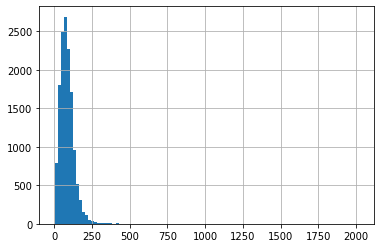

In [25]:
df['cardinality'].hist(bins=100)

#### By genre 

In [26]:
import jl_io as io

genres = io.from_file('../data/genres')

In [27]:
genre_names = [genre['name'] for genre in genres]
genre_names

['Rock',
 'Folk',
 'Pop',
 'Country',
 'Electronic',
 'Rhythm And Blues',
 'Metal',
 'Contemporary R&b',
 'Religious Music',
 'Hip Hop',
 'Reggae',
 'Jazz',
 'Blues',
 'World Music',
 'Disco',
 'Comedy',
 'New Age',
 'Classical',
 'Experimental',
 'Darkwave',
 'Soundtrack']

In [28]:
genre_df = pd.DataFrame(genre_names, columns=['genre'])

In [29]:
def create_genre_avg_column_and_show(column_name):
    genre_df[f'avg {column_name}'] = genre_df['genre'].apply( \
        lambda genre: df[df['genre'].str.contains(genre)][column_name].mean())
    
    genre_df.sort_values(by=f'avg {column_name}', ascending=False).plot.bar(x='genre', y=f'avg {column_name}')
    

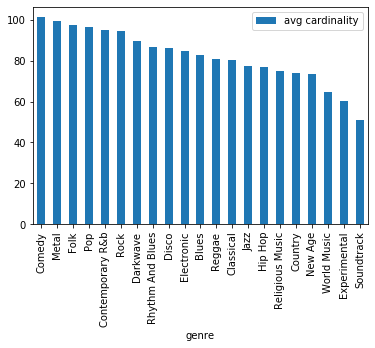

In [30]:
create_genre_avg_column_and_show('cardinality')

### Unique cardinality (number of different chords) 

In [31]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [32]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.629606
std          5.418258
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [33]:
df['unique cardinality'].mode()

0    4
dtype: int64

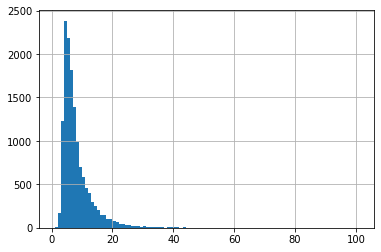

In [34]:
df['unique cardinality'].hist(bins=100)

In [35]:
pop = df[df['genre'].str.contains('Pop')]

In [36]:
jazz = df[df['genre'].str.contains('Jazz')]

In [37]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [38]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

#### By genre 

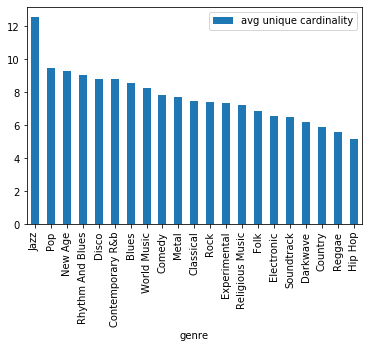

In [39]:
create_genre_avg_column_and_show('unique cardinality')

### Mode

Major :)

Minor :(

Neutral :|

In [40]:
from jl_extended_chord import ChordMode

In [41]:
df['major cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [42]:
df['minor cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [43]:
df['neutral cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [44]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14031.000000
mean        60.802437
std         51.953680
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


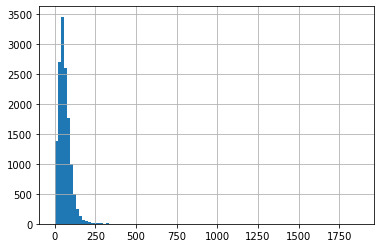

In [45]:
show_info(df['major cardinality'])

count    14031.000000
mean        22.596394
std         27.375530
min          0.000000
25%          6.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


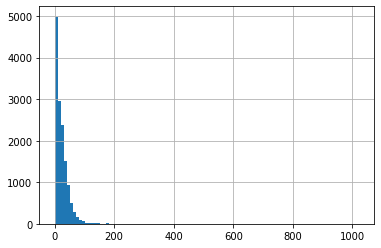

In [46]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14031.000000
mean         2.627183
std         12.161789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


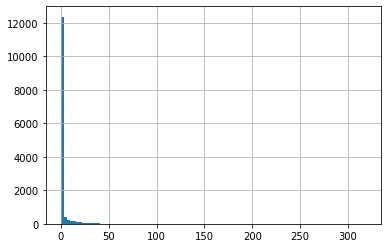

In [47]:
show_info(df['neutral cardinality'])

In [48]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",564b6999-b037-4758-9b15-3adc9b88357a,Scorpions,318,5,0,0,318


Scorpions like removing the third... :)

### Sadness  

Let's use previous features to calculate a new feature: `sadness`

In [49]:
df['sadness'] = (df['minor cardinality'] / df['cardinality'])


In [50]:
df['sadness'].describe()

count    14031.000000
mean         0.257273
std          0.201813
min          0.000000
25%          0.096872
50%          0.243590
75%          0.375000
max          1.000000
Name: sadness, dtype: float64

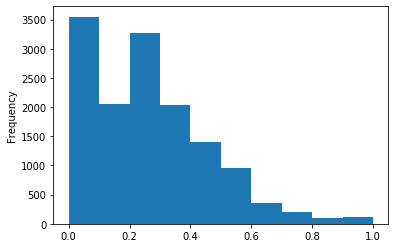

In [51]:
df['sadness'].plot.hist()

In [52]:
df[df['genre'].str.contains('Metal')]['sadness'].mean()

0.2790716907934111

In [53]:
df[df['genre'].str.contains('Jazz')]['sadness'].mean()

0.3178758089746847

In [54]:
df[df['genre'].str.contains('Pop')]['sadness'].mean()

0.2742307112838404

In [55]:
df[df['genre'].str.contains('Rock')]['sadness'].mean()

0.21933666795532078

#### By genre 

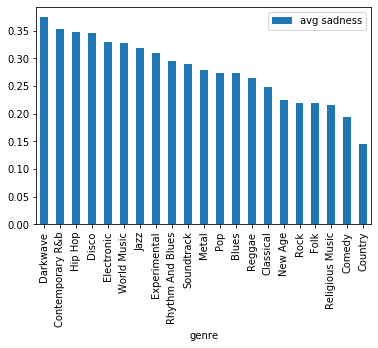

In [56]:
create_genre_avg_column_and_show('sadness')

### Harmonic mean 

In [57]:
df['harmonic mean X'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_x)

In [58]:
df['harmonic mean Y'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_y)

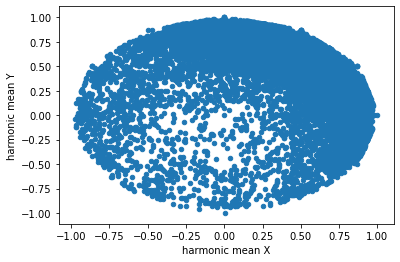

In [59]:
df.plot.scatter(x='harmonic mean X', y='harmonic mean Y')

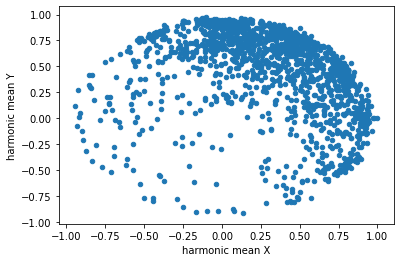

In [60]:
df[df['genre'].str.contains('Pop')].plot.scatter(x='harmonic mean X', y='harmonic mean Y')

In [61]:
df['harmonic mean position'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_position)

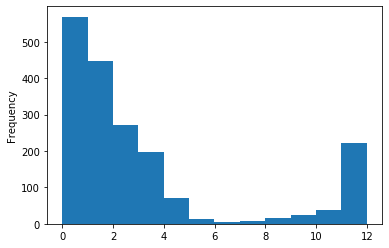

In [62]:
df[df['genre'].str.contains('Rock')]['harmonic mean position'].plot.hist(bins=12)

### Widths 

In [63]:
 df['subdominant width'] = df['chords'].apply(feature_extractor.extract_subdominant_width)

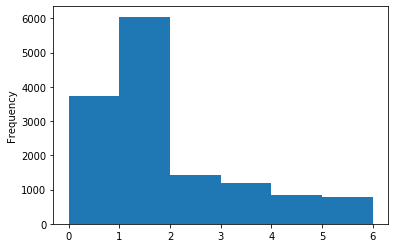

In [70]:
 df['subdominant width'].plot.hist(bins=6)

In [64]:
df['dominant width'] = df['chords'].apply(feature_extractor.extract_dominant_width)

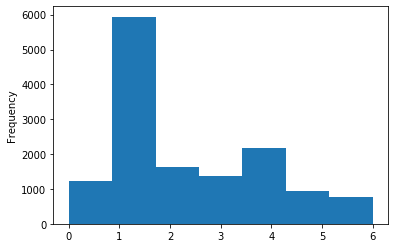

In [71]:
df['dominant width'].plot.hist(bins=7)

In [65]:
df['harmonic width'] =  df['subdominant width'] + df['dominant width']

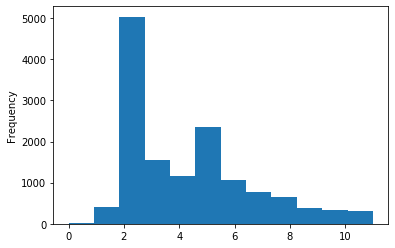

In [72]:
df['harmonic width'].plot.hist(bins=12)

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 